In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#
from textblob import TextBlob

In [2]:
tweets_df = pd.read_csv('cleaned-tsla-tweets.csv')
tweets_df.date = pd.to_datetime(tweets_df.date)
tweets_df = tweets_df.iloc[:, [0, 1, 4]]
tweets_df

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...
...,...,...,...
113736,1344758979721789440,2021-01-01,whale step last day year
113737,1344758920775086081,2021-01-01,always want get invest understand stock market...
113738,1344758902856945664,2021-01-01,rampcapitalllc open little buddy tell run mayb...
113739,1344758889393184769,2021-01-01,fantastic week thanks huge support look forwar...


In [3]:
# dropping null values
tweets_df = tweets_df.dropna()

In [4]:
# using TextBlob to get sentiment scores
tweets_df = tweets_df.assign(sentiment_score=tweets_df['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment[0]))
# removing tweets with zero sentiment scores
tweets_df = tweets_df[tweets_df.sentiment_score !=0 ].copy()
tweets_df

,id,date,cleaned_tweet,sentiment_score
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...,0.150000
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.200000
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...,0.200000
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...,0.750000
5,1212449699359330304,2020-01-02,bought share trough sell little high fearful ...,0.096071
...,...,...,...,...
113735,1344758981353476097,2021-01-01,felt invest nio already run nearly,0.100000
113737,1344758920775086081,2021-01-01,always want get invest understand stock market...,0.300000
113738,1344758902856945664,2021-01-01,rampcapitalllc open little buddy tell run mayb...,-0.093750
113739,1344758889393184769,2021-01-01,fantastic week thanks huge support look forwar...,0.450000


In [5]:
# previewing how sentiment scores differ in different tweets
random_subset = tweets_df.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date'])
random_subset = random_subset.rename(columns={'cleaned_tweet': 'Cleaned Tweet', 
                                              'sentiment_score':'Sentiment Score'})
random_subset

,Cleaned Tweet,Sentiment Score
80701,madaz turn red morning green afternoon bank k ...,-0.100000
47592,zwburger desert trader snooze fest today open ...,0.070000
105258,garyblack think mention trim call climb mid hi...,0.165000
103782,jump back green hour day consolidation news c...,-0.100000
87347,joedegs pt increase mo value assume nothing ch...,-0.031250
25304,new bull thesis ice manufacturer get bailout g...,0.118182
67344,nikolatrevor elonmusk please control troll kno...,0.333333
41236,musked insert cool meme someone keubiko maybe...,0.350000
31333,commuternyc sometimes spend lot time twitter e...,-0.100000
35805,g last time hour stochastic turn area get nice...,0.325000


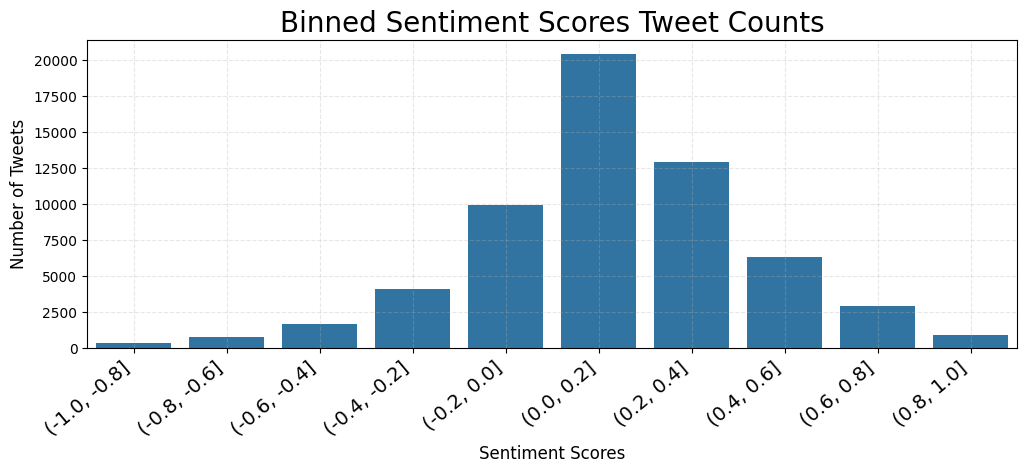

In [6]:
# plotting counts of tweets for binned sentiment scores
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)
plt.figure(figsize=(12,4))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('Sentiment Scores', fontsize=12)
# Get the positions and labels for the ticks
ticks = ax.get_xticks()
labels = [item.get_text() for item in ax.get_xticklabels()]
# Customize the labels (in this case, rotate them)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts', fontsize=20)
ax.grid(True,linestyle='--',alpha=0.3)
plt.show()

In [7]:
# Calculating daily average sentiment scores
daily_sentiment_scores_df = tweets_df[['date', 'sentiment_score']]
# daily average sentiment scores
daily_sentiment_scores_df = daily_sentiment_scores_df.resample('D', on='date').mean()
daily_sentiment_scores_df

,sentiment_score
date,
2020-01-01,0.154961
2020-01-02,0.161528
2020-01-03,0.128297
2020-01-04,0.144796
2020-01-05,0.132267
...,...
2020-12-28,0.151300
2020-12-29,0.118094
2020-12-30,0.172049


In [8]:
daily_sentiment_scores_df.isnull().sum()

sentiment_score    0
dtype: int64

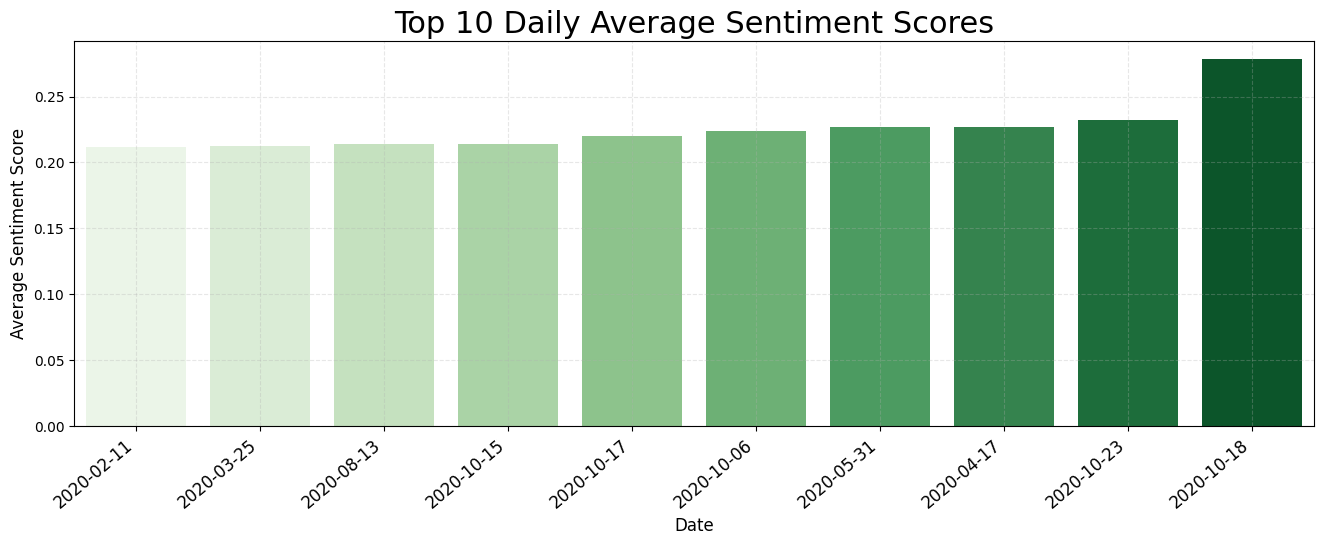

In [9]:
# plotting top 10 daily average sentiment scores
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10).sort_values(by=['sentiment_score'],ascending=True)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score']
                 ,hue=top_avg_df.index.date
                 ,palette='Greens')
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
# Get the positions and labels for the ticks
ticks = ax.get_xticks()
labels = [item.get_text() for item in ax.get_xticklabels()]
# Customize the labels (in this case, rotate them)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=40, ha='right', fontsize=12)
ax.set_title('Top 10 Daily Average Sentiment Scores', fontsize=22)
ax.legend([],[], frameon=False)
ax.grid(True,linestyle='--',alpha=0.3)
plt.show()

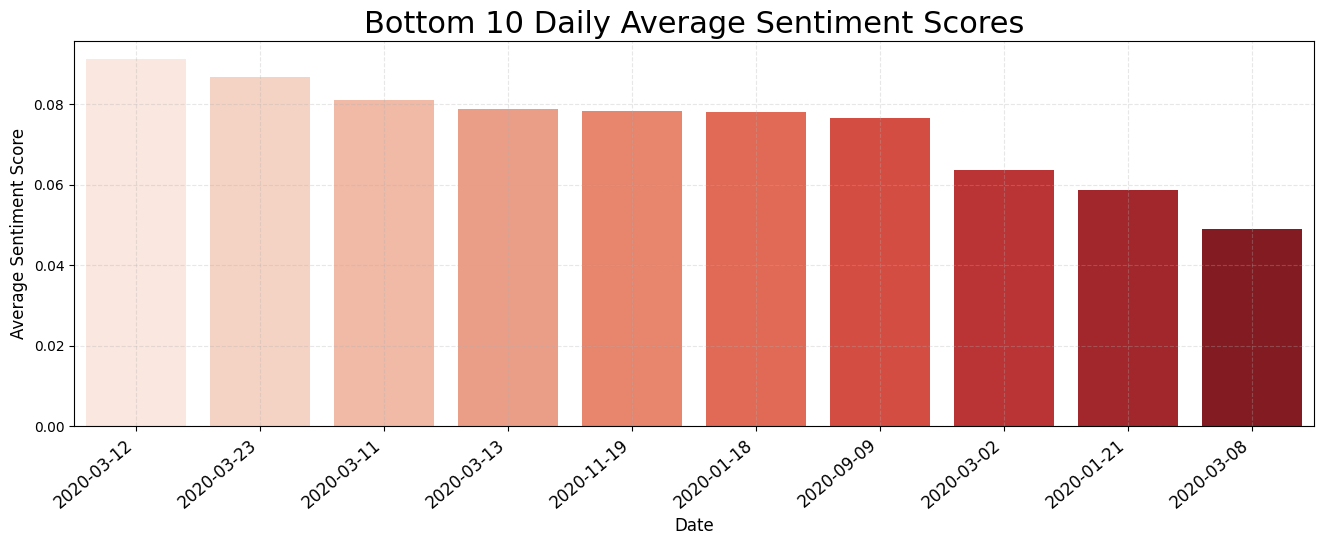

In [10]:
# plotting bottom 10 daily average sentiment scores
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10).sort_values(by=['sentiment_score'],ascending=False)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score']
                 ,hue=top_avg_df.index.date
                 ,palette='Reds')
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
# Get the positions and labels for the ticks
ticks = ax.get_xticks()
labels = [item.get_text() for item in ax.get_xticklabels()]
# Customize the labels (in this case, rotate them)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=40, ha='right', fontsize=12)
ax.set_title('Bottom 10 Daily Average Sentiment Scores', fontsize=22)
ax.legend([],[], frameon=False)
ax.grid(True,linestyle='--',alpha=0.3)
plt.show()

In [11]:
# Saving sentiment analysis results
daily_sentiment_scores_df.reset_index().to_csv('daily-avg-sentiment-scores.csv',index=False)